# Project Name

Project Type - EDA, Sentiment Analysis, Clustering

Contribution - Individual

# Project Summary

Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.  Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city.

**So, this project focuses on analysing the Zomato restaurant data for each city in India.**

1. The Project focuses on Customers and Company.
2. We have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations.
3. Also, cluster the zomato restaurants into different segments.
4. The data is vizualized as it becomes easy to analyse data at instant.
5. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

**This could help in clustering the restaurants into segments.**

6. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis.
7. Also the metadata of reviewers can be used for identifying the critics in the industry.

#Github Link

https://github.com/TarunSinghal960/Zomato-Sentiment-analysis.git

#Problem Statement

With the increasing volume of customer reviews on platforms like Zomato, extracting meaningful insights from this data is crucial for both customers and businesses. Customers rely on reviews to find the best restaurants, while businesses can use feedback to improve their services. However, manually analyzing thousands of reviews is inefficient. Additionally, restaurant clustering based on various attributes such as ratings, cuisine, and cost can help customers make informed decisions. Moreover, cost vs. benefit analysis can provide insights into whether the pricing of restaurants aligns with the quality and experience they offer.

### Business Objective

1. **Sentiment Analysis** - Analyze customer reviews to classify sentiments (positive, neutral, negative) and gain insights into customer satisfaction

2. **Visualization** - Provide intuitive and insightful visual representations of sentiment trends, ratings, and other key metrics.

3. **Restaurant Clustering** - Group restaurants based on factors such as cuisine type, ratings, and location to help customers discover top-rated places nearby and assist businesses in identifying areas for improvement.

4. **Cost vs. Benefit Analysis** - Assess the pricing strategies of restaurants in relation to customer satisfaction and service quality, enabling better decision-making for both customers and business owners.

#General Guidelines

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


---



---



#Let's Begin !

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Load Dataset
restaurants = pd.read_csv("/content/Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("/content/Zomato Restaurant reviews.csv")



---



## Data Cleaning and processing


In [ ]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [ ]:
restaurants.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# (Reviews Dataset) Duplicate Value Count

duplicate_count = reviews.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 36


In [ ]:
# (Reviews dataset) Removing dulicates

reviews.drop_duplicates(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9964 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9964 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.8+ KB


Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64



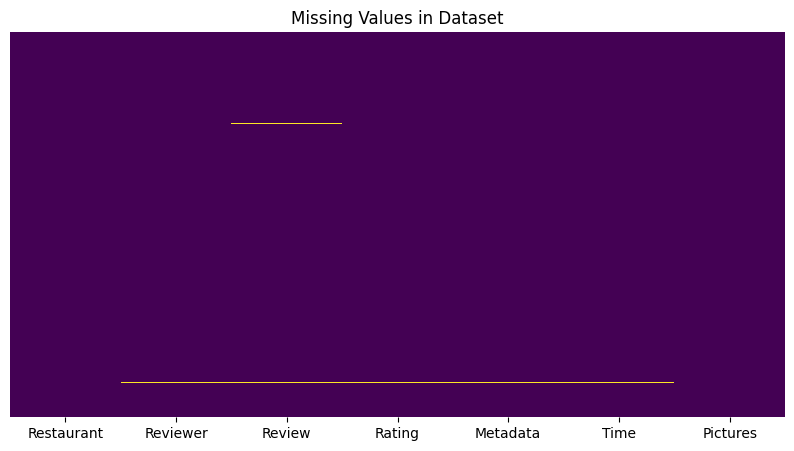

In [ ]:
# (Review dataset) Missing Values/Null Values Count

missing_values = reviews.isnull().sum()
print(missing_values, end = "\n\n")

# Visualizing the missing values

plt.figure(figsize=(10,5))
sns.heatmap(reviews.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

In [ ]:
# (Review dataset) Removing rows with missing values

reviews.dropna(inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [ ]:
# (Review dataset) Listing unique values in Rating column

print("Rating column unique values :", reviews['Rating'].value_counts())

Rating column unique values : Rating
5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64


In [ ]:
# (Review dataset) Viewing row with Rating = 'Like

print(reviews[reviews['Rating'] == 'Like'])
restaurant_name = reviews.loc[reviews["Rating"] == "Like", "Restaurant"].values[0]

                         Restaurant           Reviewer  \
7601  The Old Madras Baking Company  Dhanasekar Kannan   

                                                 Review Rating  \
7601  One of the best pizzas to try. It served with ...   Like   

                       Metadata             Time  Pictures  
7601  12 Reviews , 21 Followers  5/18/2019 12:31         1  


In [ ]:
# (Review dataset) Replacing "like" with mean value

average_rating = pd.to_numeric(reviews[reviews['Restaurant'] == restaurant_name]["Rating"], errors="coerce").mean()
reviews["Rating"] = reviews["Rating"].replace("Like", average_rating)
reviews['Rating'] = pd.to_numeric(reviews['Rating'])

print("Rating column unique values :", reviews['Rating'].value_counts())

Rating column unique values : Rating
5.000000    3826
4.000000    2373
1.000000    1735
3.000000    1192
2.000000     684
4.500000      69
3.500000      47
2.500000      19
1.500000       9
3.616162       1
Name: count, dtype: int64


In [ ]:
reviews["Rating"] = reviews["Rating"].round(1)
print("Rating column unique values :", reviews['Rating'].value_counts())

Rating column unique values : Rating
5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
3.6       1
Name: count, dtype: int64


In [ ]:
# Converting review time to datetime

reviews['Time'] = pd.to_datetime(reviews['Time'])

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9955 non-null   object        
 1   Reviewer    9955 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9955 non-null   float64       
 4   Metadata    9955 non-null   object        
 5   Time        9955 non-null   datetime64[ns]
 6   Pictures    9955 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 622.2+ KB


In [ ]:
# (Restaurant Dataset) Duplicate Value Count

duplicate_count = restaurants.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64



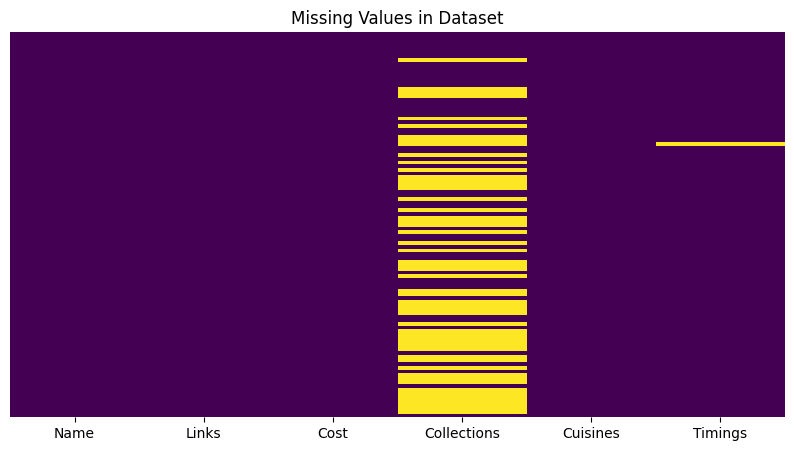

In [ ]:
# (Restaurant dataset) Missing Values/Null Values Count

missing_values = restaurants.isnull().sum()
print(missing_values, end = "\n\n")

# Visualizing the missing values

plt.figure(figsize=(10,5))
sns.heatmap(restaurants.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

In [ ]:
# (Restaurant dataset) Since ollections column has more than 50% values missing, we can drop the column

restaurants.drop("Collections", axis=1, inplace=True)
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    object
 3   Cuisines  105 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [ ]:
# (Restaurant dataset) Converting cost column to float by first removing commas ',' and then changing data type

restaurants['Cost'] = restaurants['Cost'].astype(str).str.replace(',', '').astype(float)
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      105 non-null    object 
 1   Links     105 non-null    object 
 2   Cost      105 non-null    float64
 3   Cuisines  105 non-null    object 
 4   Timings   104 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.2+ KB


## Dataset Description

### Original Datasets

There are 2 datasets given:

1. Restaurant metadata dataset : Contains data about 105 restaurants listed on Zomato and their metadata

    Columns:
    * Name - Restaurant name (Object)
    * Links - URL (Object)
    * Cost - Cost per dining (Object)
    * Collections - Categories (Object)
    * Cuisines - Cusines offered (Object)
    * Timings - Opening timings (Object)


    Duplicates: 0 rows
    Missing values: 54 (Collections column)

2. Restaurant reviews : Contains data of the customer reviews (10,000 entries) for the restaurants in the restaurant dataset.

    Columns:
    * Restaurant - Name (Object)
    * Reviewer - Name (Object)
    * Review - (Object)
    * Rating - Rating on the scale 1-5 (Object)
    * Metadata - (Object)
    * Time - Date and time (Object)
    * Pictures - Number of pictures(Discrete numerical)


    Duplicates: 36 rows
    Missing values: 45

### After data cleaning and manipulation

There are 2 datasets given:

1. Restaurant metadata dataset : Contains data about 105 restaurants listed on Zomato and their metadata

    Columns:
    * Name - Restaurant name (Object)
    * Links - URL (Object)
    * Cost - Cost per dining (Float)
    * Cuisines - Cusines offered (Object)
    * Timings - Opening timings (Object)


    Duplicates: 0 rows
    Missing values: 54 (Collections column)
    Dropped Collections Column

2. Restaurant reviews : Contains data of the customer reviews (10,000 entries) for the restaurants in the restaurant dataset.

    Columns:
    * Restaurant - Name (Object)
    * Reviewer - Name (Object)
    * Review - (Object)
    * Rating - Rating on the scale 1-5 (Continuous numerical)
    * Metadata - (Text)
    * Time - Date and time (Datetime)
    * Pictures - Number (Discrete numerical)


    Duplicates: 36 rows
    Missing values: 45
    Removed rows with duplicate and missing values

    Rows remaining: 9955

### Manipulations done

1. Removed duplicates from both datasets
2. Removed rows with missing values from Reviews dataset
3. Dropped 'Collections' column from Restaurants Dataset
4. Replaced the value 'Like' in the Rating column with the mean 'Rating' of that specific restaurant
5. Changed the datatype of 'Rating' Column to float
6. Changed the datatype of 'Time' column in Reviews dataset to datetime
7. Changed the datatype of 'Cost' column in Restaurants dataset to float

## Understanding variables

### Reviews dataset

In [ ]:
reviews.describe()

,Rating,Time,Pictures
count,9955.000000,9955,9955.000000
mean,3.600261,2018-11-29 12:33:09.088900096,0.751984
min,1.000000,2016-05-31 16:41:00,0.000000
25%,3.000000,2018-08-12 00:10:30,0.000000
50%,4.000000,2018-12-24 00:13:00,0.000000
75%,5.000000,2019-03-31 20:10:00,0.000000
max,5.000000,2019-05-25 20:23:00,64.000000
std,1.483498,NaN,2.575691


In [ ]:
# Rating Column

reviews['Rating'].value_counts()

,count
Rating,
5.0,3826
4.0,2373
1.0,1735
3.0,1192
2.0,684
4.5,69
3.5,47
2.5,19
1.5,9


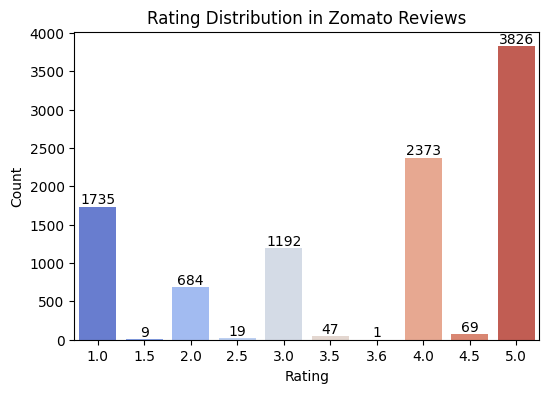

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=reviews['Rating'], palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container)

plt.title("Rating Distribution in Zomato Reviews")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The above plot shows that more than half of the reviews have the rating of more than 2.5, 3.6 rating being the mean. The rating of 5 is in the majority.

In [ ]:
# Pictures column

reviews['Pictures'].value_counts()

,count
Pictures,
0,7971
1,707
2,383
3,246
4,129
5,116
7,86
6,85
8,55


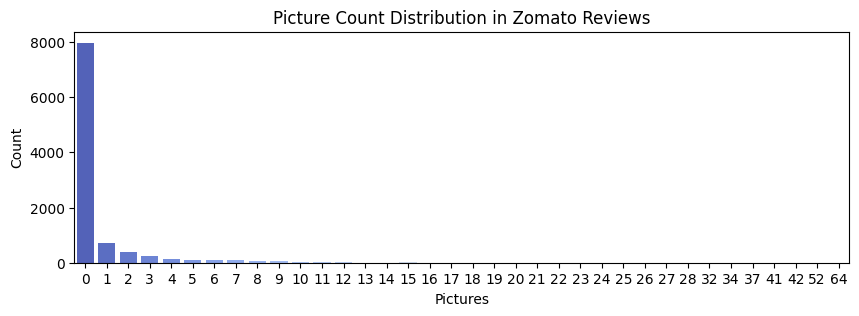

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x=reviews['Pictures'], palette='coolwarm')
plt.title("Picture Count Distribution in Zomato Reviews")
plt.xlabel("Pictures")
plt.ylabel("Count")
plt.show()

The above bar graph shows that moajority of the reviews, 7971, have no pictures attached. Moreover, mojority of the remaining reviews have only 1-5 pictures attched with them. With that we can conclude that number of pictures have almost no affect on other variables as well as on the overall analysis.

In [ ]:
# Time Column

reviews['Time'].value_counts()

,count
Time,
2018-07-06 23:15:00,3
2018-07-29 20:34:00,3
2019-05-14 23:44:00,3
2019-05-05 22:39:00,3
2019-05-24 21:17:00,3
...,...
2019-02-15 18:59:00,1
2019-02-15 15:57:00,1
2019-02-15 15:39:00,1


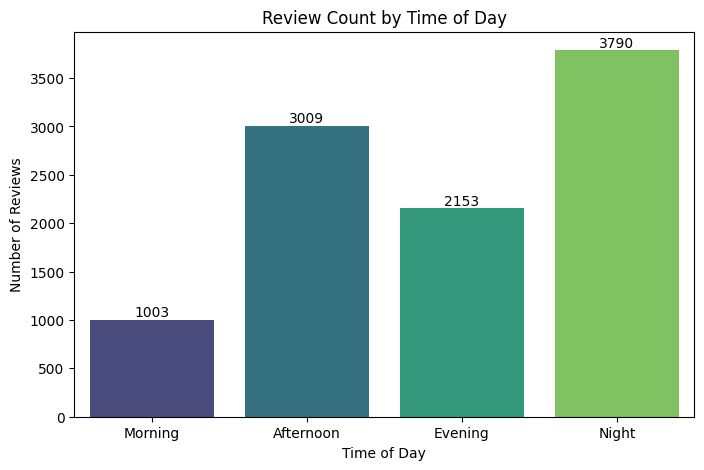

In [ ]:
# Function to categorize time
def classify_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function to create a new column
reviews["time_class"] = reviews["Time"].dt.hour.apply(classify_time)

#visualization

plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_class", data=reviews, order=["Morning", "Afternoon", "Evening", "Night"], palette="viridis")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Time of Day")
plt.ylabel("Number of Reviews")
plt.title("Review Count by Time of Day")
plt.show()


With the above bar graph, we infer that people are least active in the morning while mmost active in the afternoon and night during the meal times. Restaurants can use this data to adjust their timings accordingly.

### Restaurant Dataset

In [ ]:
restaurants.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [ ]:
# Cost Column

restaurants['Cost'].value_counts()

,count
Cost,
500.0,13
600.0,10
700.0,8
1200.0,7
1000.0,6
400.0,6
200.0,5
1500.0,5
800.0,5


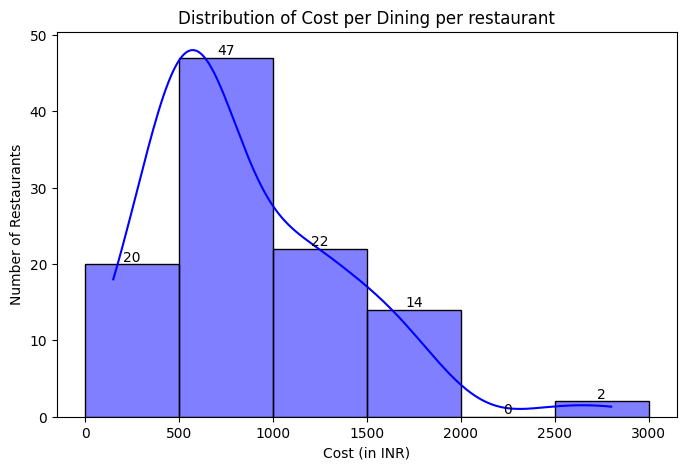

In [ ]:
plt.figure(figsize=(8,5))

ax = sns.histplot(restaurants["Cost"], bins=range(0, int(restaurants["Cost"].max()) + 500, 500), kde=True, color="blue")

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Cost (in INR)")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Cost per Dining per restaurant")
plt.xticks(range(0, int(restaurants["Cost"].max()) + 500, 500))  # Set x-axis ticks at 500 intervals

plt.show()


With the above histogram we can infer that dining cost at majority of the restaurants lies between 0-2000, with highest number of restaurants being in the range 500 - 1000.

## Sentiment Analysis

### Applying Vader for Sentiment Analysis

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

reviews['Cleaned_Review'] = reviews['Review'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,time_class,Cleaned_Review
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Afternoon,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Afternoon,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Night,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Night,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Night,food goodwe ordered kodi drumsticks basket mut...


In [ ]:
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']  # Compound score (-1 to +1)
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

def get_sentiment_score(text):
    return int(sia.polarity_scores(text)['compound'] * 100)

# Apply sentiment analysis
reviews['Sentiment'] = reviews['Cleaned_Review'].astype(str).apply(get_sentiment)
reviews['Sentiment_score'] = reviews['Cleaned_Review'].astype(str).apply(get_sentiment_score)

In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,time_class,Cleaned_Review,Sentiment,Sentiment_score
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Afternoon,ambience good food quite good saturday lunch c...,Positive,96
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Afternoon,ambience good pleasant evening service prompt ...,Positive,93
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Night,must try great food great ambience thnx servic...,Positive,91
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Night,soumen das arun great guy behavior sincerety g...,Positive,85
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Night,food goodwe ordered kodi drumsticks basket mut...,Positive,92


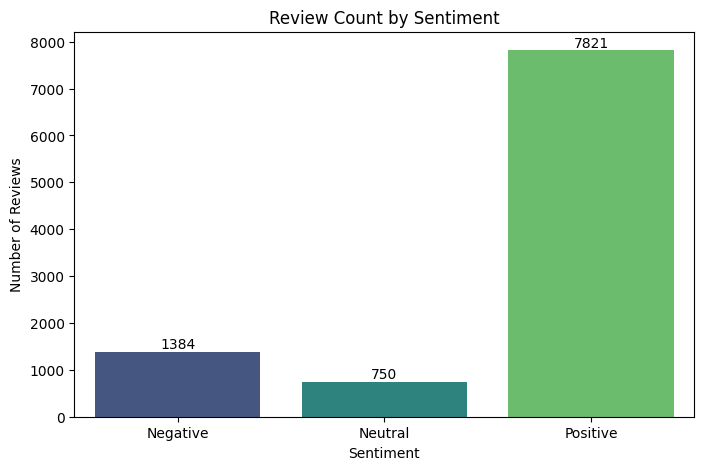

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="Sentiment", data=reviews, order=["Negative", "Neutral", "Positive"], palette="viridis")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Review Count by Sentiment")
plt.show()

With the above bar plot, we can infer that most of the reviews have positive sentiment to them. That means they are good reviews.

We can now conclude that review sentiment almost syncronize with the rating distribution.

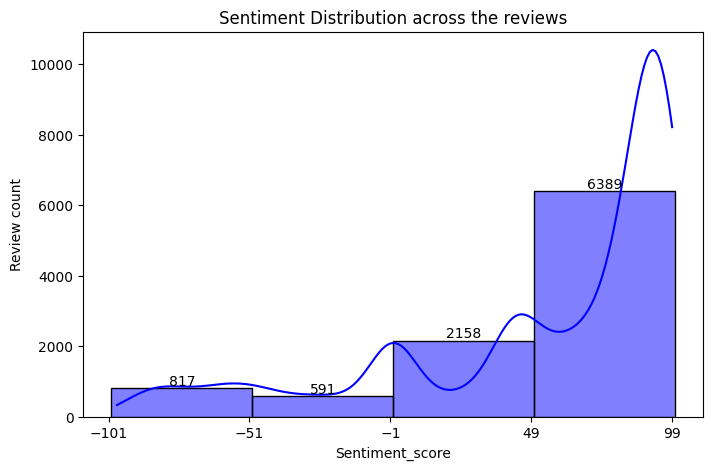

In [ ]:
plt.figure(figsize=(8,5))

ax = sns.histplot(reviews["Sentiment_score"], bins=range(-100, 101, 50), kde=True, color="blue")

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Sentiment_score")
plt.ylabel("Review count")
plt.title("Sentiment Distribution across the reviews")
plt.xticks(range(-101, 101, 50))  # Set x-axis ticks at 500 intervals

plt.show()


In the above histogram, we can see the detailed overview of the sentiment score distribution. Sentiment score is always between -1 to 1. As the range() function cannot work with float values, we had to convert them into integers by multiplying them with 100.

-100 <= x < 50 -> Negative

-50 <= x < 50 -> neutral

50 <= x <= 100 -> Positive

In [ ]:
# Compute average rating per restaurant
avg_ratings = reviews.groupby("Restaurant")["Rating"].mean().reset_index()

# Merge with restaurant dataset
df_merged = restaurants.merge(avg_ratings, left_on="Name", right_on="Restaurant", how="left")

# Drop redundant column
df_merged.drop(columns=["Restaurant"], inplace=True)

print(df_merged.head())  # Check the dataset
print(df_merged.shape)

                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links    Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800.0   
1  https://www.zomato.com/hyderabad/paradise-gach...   800.0   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300.0   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800.0   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200.0   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  R

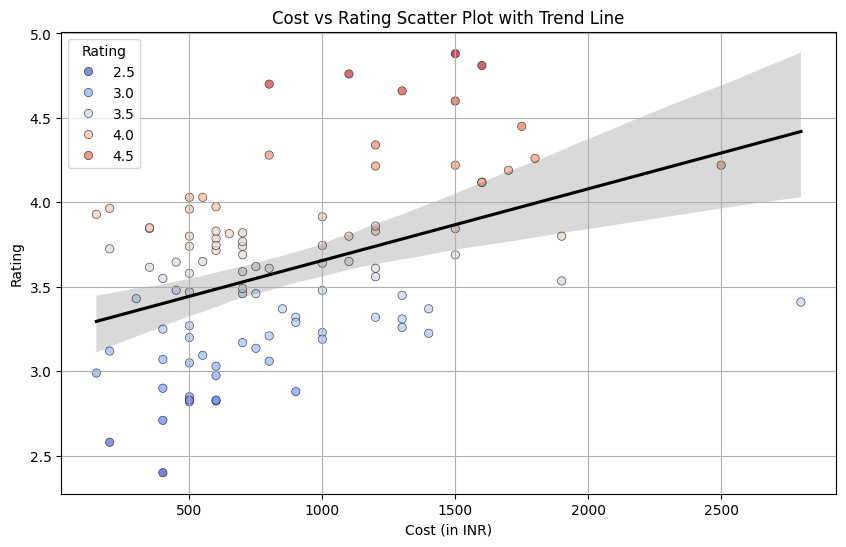

In [ ]:
# Creating Scatter plot on Cost vs Rating variables for each restaurant
# Along woth regression plot to find out the trend

plt.figure(figsize=(10,6))

sns.scatterplot(data=df_merged, x="Cost", y="Rating", hue="Rating", palette="coolwarm", edgecolor="black", alpha=0.7)
sns.regplot(data=df_merged, x="Cost", y="Rating", scatter=False, color="black")  # Add trend line

plt.xlabel("Cost (in INR)")
plt.ylabel("Rating")
plt.title("Cost vs Rating Scatter Plot with Trend Line")
plt.legend(title="Rating")
plt.grid(True)

plt.show()

With the above Scatter plot and regression plot, we can infer a few things.

1. Most if the restaurants with ratings between 3 and 4 have the per dining cost of 0 - 1500.
2. The regression plot is positive. This shows a positive correlation between Cost and Rating
3. However, since the slant of the line is not very steep, the correlation between Cost and Rating is not very strong.

With this we can conclude that Dining Cost or Price is not a deciding factor in increasing the Rating of the restaurant. There are various other factors that may be included in deciding the Rating. Some of them might be:

1. Great environment to dine in.
2. Dining service
3. Food quality
4. Delivery services



---


## Restaurant Clusters based on Cost and Rating

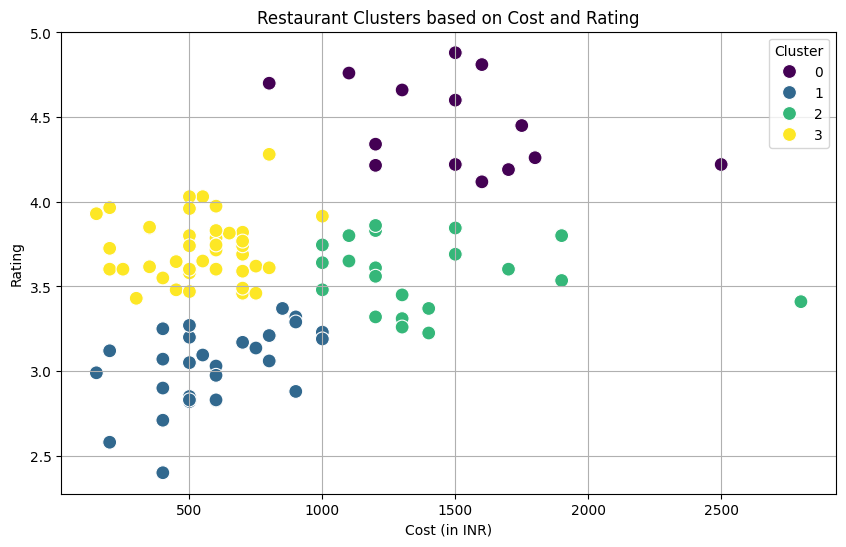

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_merged["Cost"].fillna(df_merged["Cost"].mean(), inplace=True)
df_merged["Rating"].fillna(df_merged["Rating"].mean(), inplace=True)

# Select features for clustering
X = df_merged[["Cost", "Rating"]]

# Normalize data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering (Choose 3 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_merged["cluster"] = kmeans.fit_predict(X_scaled)

# Scatter plot with clusters

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merged, x="Cost", y="Rating", hue=df_merged["cluster"], palette="viridis", s=100)

plt.xlabel("Cost (in INR)")
plt.ylabel("Rating")
plt.title("Restaurant Clusters based on Cost and Rating")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


With the above k-means Cluster plot, we can observe 4 main clusters.

1. Cluster 0: Defines restaurants with Best Mean Ratings and Dining Cost in a bit expensive range.
2. Cluster 1: Defines restaurants with Worst Mean Ratings and Dining Cost in the cheap range.
3. Cluster 2: Defines restaurants with really good (but not the best) Mean Ratings and Dining Cost in a bit expensive range.
4. Cluster 3: Defines restaurants with really good (but not the best) Mean Ratings and Dining Cost in the cheap range.

We can infer that cluster 3 is the ideal cluster for any restaurant to further evolve and imprive their business.

**Cluster 3 is really Value for Money.**

## Cost VS Benefit Analysis

Here we first Normalize cost and rating values, and then calculate the cost_benefit_score. Higher the scorem better the restaurant in terms of cost as well as rating.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
df_filtered = df_merged[["Name", "Cost", "Rating"]].dropna()

# Normalize cost and rating
scaler = MinMaxScaler()
df_filtered[["cost_scaled", "rating_scaled"]] = scaler.fit_transform(df_filtered[["Cost", "Rating"]])

In [ ]:
# Small offset to avoid zero division

df_filtered["cost_scaled"] = df_filtered["cost_scaled"] + 1e-6

# Calculating cost-benefit score by dividing rating_scaled by cost_scaled
# Higher the score, better the restaurant

df_filtered["cost_benefit_score"] = df_filtered["rating_scaled"] / df_filtered["cost_scaled"]

# Replacing infinite score values by max values

df_filtered["cost_benefit_score"].replace(np.inf, df_filtered["cost_benefit_score"].max(), inplace=True)

In [ ]:
# Sorting restaurants by decreasing cost_benefit_score

df_filtered = df_filtered.sort_values(by="cost_benefit_score", ascending=False)

# Top 10 best-value restaurants

print(df_filtered[["Name", "Cost", "Rating", "cost_benefit_score"]].head(10))

                         Name   Cost    Rating  cost_benefit_score
23                       Amul  150.0  3.929293       616650.374715
89        Mohammedia Shawarma  150.0  2.990000       237903.225806
59                  KS Bakers  200.0  3.965000           33.443792
85              Momos Delight  200.0  3.725000           28.315032
101              Sweet Basket  200.0  3.601889           25.684168
29         Hunger Maggi Point  200.0  3.120000           15.386281
103               Wich Please  250.0  3.601889           12.842424
58                   Tempteys  350.0  3.850000            7.746873
9                 Cream Stone  350.0  3.845000            7.720160
7    Shah Ghouse Spl Shawarma  300.0  3.430000            7.337236


In [ ]:
df_filtered.head()

,Name,Cost,Rating,cost_scaled,rating_scaled,cost_benefit_score
23,Amul,150.0,3.929293,0.000001,0.616650,616650.374715
89,Mohammedia Shawarma,150.0,2.990000,0.000001,0.237903,237903.225806
59,KS Bakers,200.0,3.965000,0.018869,0.631048,33.443792
85,Momos Delight,200.0,3.725000,0.018869,0.534274,28.315032
101,Sweet Basket,200.0,3.601889,0.018869,0.484633,25.684168


Here, since the first 2 values in the cost_scales is very near to zero, it may lead to really high cost_benefit_score. Hence, we need to assign variable to them camparable to other rows.

In [ ]:
df_filtered['cost_scaled'] = df_filtered['cost_scaled'].replace(0.000001, 0.01)
df_filtered.head()

,Name,Cost,Rating,cost_scaled,rating_scaled,cost_benefit_score
23,Amul,150.0,3.929293,0.010000,0.616650,616650.374715
89,Mohammedia Shawarma,150.0,2.990000,0.010000,0.237903,237903.225806
59,KS Bakers,200.0,3.965000,0.018869,0.631048,33.443792
85,Momos Delight,200.0,3.725000,0.018869,0.534274,28.315032
101,Sweet Basket,200.0,3.601889,0.018869,0.484633,25.684168


In [ ]:
# Calculating cost-benefit score by dividing rating_scaled by cost_scaled
# Higher the score, better the restaurant

df_filtered["cost_benefit_score"] = df_filtered["rating_scaled"] / df_filtered["cost_scaled"]

# Replacing infinite score values by max values

df_filtered["cost_benefit_score"].replace(np.inf, df_filtered["cost_benefit_score"].max(), inplace=True)

# Sorting restaurants by decreasing cost_benefit_score

df_filtered = df_filtered.sort_values(by="cost_benefit_score", ascending=False)

# Top 10 best-value restaurants

df_filtered.head(10)

,Name,Cost,Rating,cost_scaled,rating_scaled,cost_benefit_score
23,Amul,150.0,3.929293,0.010000,0.616650,61.665037
59,KS Bakers,200.0,3.965000,0.018869,0.631048,33.443792
85,Momos Delight,200.0,3.725000,0.018869,0.534274,28.315032
101,Sweet Basket,200.0,3.601889,0.018869,0.484633,25.684168
89,Mohammedia Shawarma,150.0,2.990000,0.010000,0.237903,23.790323
29,Hunger Maggi Point,200.0,3.120000,0.018869,0.290323,15.386281
103,Wich Please,250.0,3.601889,0.037737,0.484633,12.842424
58,Tempteys,350.0,3.850000,0.075473,0.584677,7.746873
9,Cream Stone,350.0,3.845000,0.075473,0.582661,7.720160
7,Shah Ghouse Spl Shawarma,300.0,3.430000,0.056605,0.415323,7.337236


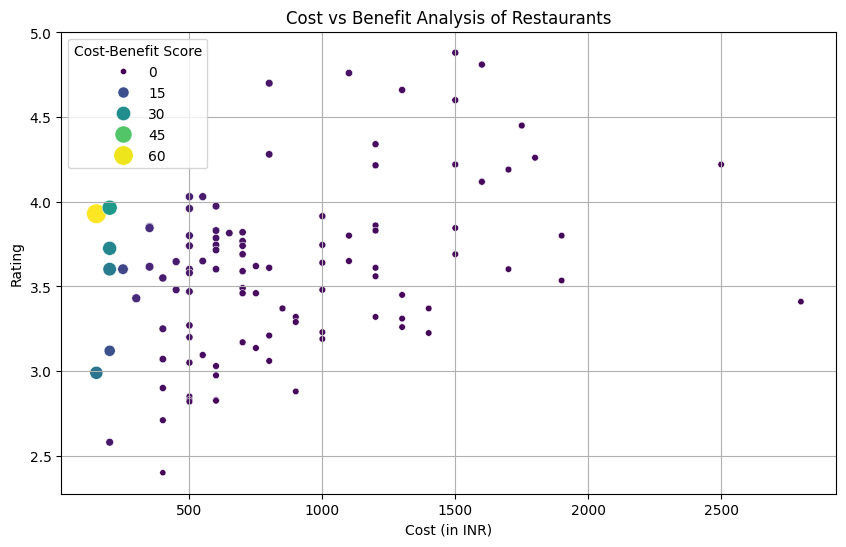

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x="Cost", y="Rating", size="cost_benefit_score", hue="cost_benefit_score", palette="viridis", sizes=(20,200))

plt.xlabel("Cost (in INR)")
plt.ylabel("Rating")
plt.title("Cost vs Benefit Analysis of Restaurants")
plt.legend(title="Cost-Benefit Score", loc= 'best')
plt.grid(True)

plt.show()


With this scatter-plot, we can infer that the datapoints (restaurants) woth big size have highest cost-benefit score. Since, the cost is in the cheap range and the rating is really good, these restaurants are value for money.

### Data Clustering based on cost-benefit score

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns
X = df_filtered[["Cost", "Rating", "cost_benefit_score"]]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

First we need to create an Elbow plot to find out the optimal number of clusters.

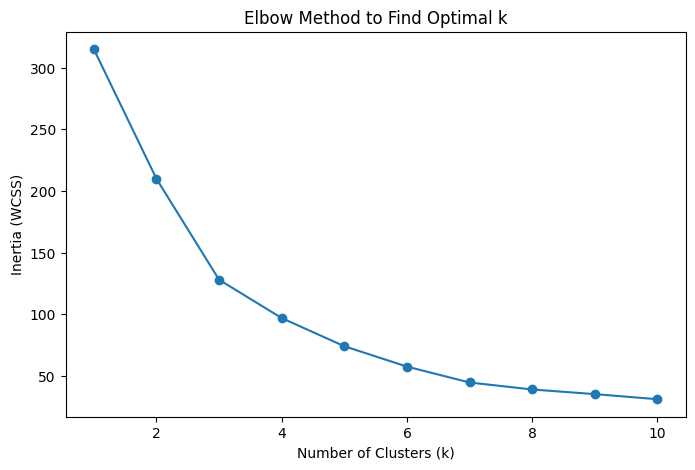

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Inertia = sum of squared distances to cluster centers

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method to Find Optimal k")
plt.show()


With the above Elbow plot, since the slant slows down at 3, we can infer that 3 is the optimal number of clusters.

In [ ]:
# Apply K-Means (Choose 3 clusters: High Value, Luxury, Overpriced)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_filtered["cluster"] = kmeans.fit_predict(X_scaled)


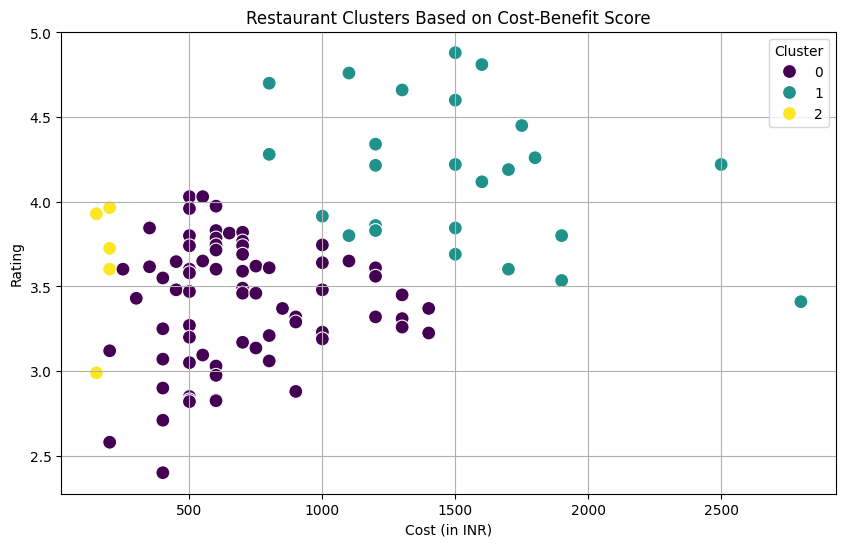

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x="Cost", y="Rating", hue=df_filtered["cluster"], palette="viridis", s=100)

plt.xlabel("Cost (in INR)")
plt.ylabel("Rating")
plt.title("Restaurant Clusters Based on Cost-Benefit Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In the above scatter plot with K-means cluster plot, there are 3 clusters:

1. Cluster 0: Defines restaurants with average rating and average pricing.
2. Cluster 1: Defines restaurants with higher pricing and average to high rating.
3. Cluster 2: Defines restaurants with low pricing and high rating.

Here, the ideal cluster would be cluster 2 with low pricing and high rating, whoch means they very high Cost-benefit score.

# Solution to Business Objective

#### What do you suggest the client to achieve Business Objective ?

Client should try to lower the overall dining costs at their restaurants, and increase overall quality of food, environment and services in order to improve cost-benefit score and thereby increase the overall rating.

#Conclusion

The increase in cost doesn't have real affect on rating. The main aim should be to increase the cost-benefit score, which can be done by increasing the service and food quality, and maintaining the dining cost in low-medium level.